In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score
from pyts.metrics import dtw
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
train_data = np.genfromtxt('../data/OSULeaf_TRAIN.txt')
test_data = np.genfromtxt('../data/OSULeaf_TEST.txt')

In [3]:
X_train = train_data[:,1:]
y_train = train_data[:,0]

In [4]:
X_test = test_data[:,1:]
y_test = test_data[:,0]

In [5]:
dtw_dict = {}
dtw_pred = []
classes = np.unique(y_train)
for test_seq in X_test:
    for CLASS in classes:
        train_class = X_train[np.where(y_train==CLASS)]
        dtw_score = []
        for train_seq in train_class:
            with warnings.catch_warnings(): #FutureWarning ignore
                warnings.simplefilter('ignore')
                dtw_score.append(dtw(test_seq, train_seq))
        dtw_dict[CLASS] = np.min(dtw_score)
    dtw_pred.append(min(dtw_dict, key=dtw_dict.get))

In [6]:
accuracy_score(y_test, dtw_pred)

0.5909090909090909

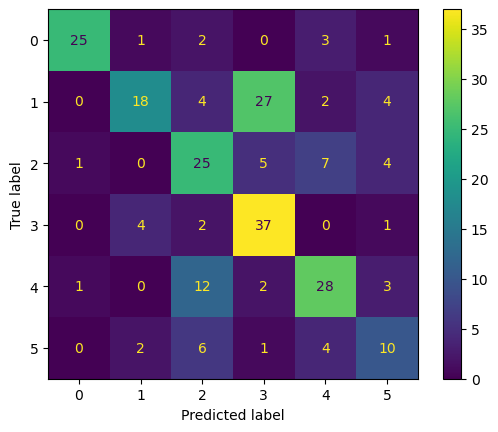

In [7]:
cm = confusion_matrix(y_test, dtw_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [48]:
# Define the classifier
clf = ShapeletTransformClassifier(estimator=RandomForestClassifier(), 
                                  n_shapelet_samples=1000,
                                  max_shapelets=600,
                                  batch_size=50,
                                  random_state=42)

In [49]:
# Train the model
clf.fit(X_train, y_train)

ShapeletTransformClassifier(batch_size=50, estimator=RandomForestClassifier(),
                            max_shapelets=600, n_shapelet_samples=1000,
                            random_state=42)

In [50]:
# Predict and evaluate
y_pred = clf.predict(X_test)

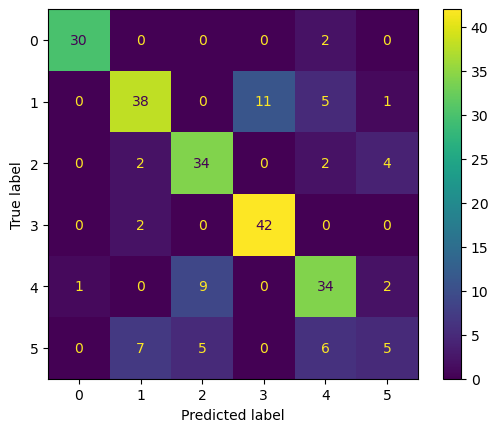

In [51]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [52]:
accuracy_score(y_test, y_pred)

0.756198347107438